In [1]:
from my_weapon import *
from collections import defaultdict

In [2]:
url_tweets = json.load(open("data/url_tweets_v2.json"))
# del url_tweets[0] # 第一条too general 目前的数据已经删除

In [8]:
starters_cnt = 0
IRAs_cnt = 0
first_users = set()
starter_users = set()
IRAs = set()

for fake in url_tweets:
    for j, t in enumerate(fake["tweets"]):
        if t["IRA"]:
            IRAs.add(t["user_id"])
            IRAs_cnt += 1
            
        if t["origin"]:
            starters_cnt += 1
            starter_users.add(t["user_id"])
            if j == 0:
                first_users.add(t["user_id"])
    
len(url_tweets), starters_cnt, len(first_users), len(starter_users), len(IRAs), IRAs_cnt

(189620, 914272, 25212, 88215, 109, 912)

In [9]:
from SQLite_handler import find_user_info

starter_users_info = []

with open("data/sources_users_info.json", "w") as f:
    for user_id in tqdm(starter_users):
        d = find_user_info(user_id)
        if d:
            if user_id in first_users:
                d["first"] = True
            else:
                d["first"] = False
            starter_users_info.append(d)
            f.write(json.dumps(d, ensure_ascii=False) + "\n")

100%|██████████| 88215/88215 [00:13<00:00, 6388.54it/s]


In [10]:
len(starter_users_info)

81959

In [11]:
starter_users_info = []

for line in open("data/sources_users_info.json"):
    starter_users_info.append(json.loads(line))
    
user_info = pd.DataFrame(starter_users_info)

In [12]:
user_info.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,first,follow_request_sent,followers_count,following,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,url,utc_offset,verified
0,False,Sat Sep 08 21:27:35 +0000 2012,False,False,Conspiracies Tv Series,0,True,None,1365,None,...,F6F6F6,333333,True,False,Conspiraciestv,34166,Pacific Time (US & Canada),https://vimeo.com/channels/conspiraciestv,-25200.0,False
1,False,Wed Dec 22 05:20:23 +0000 2010,False,False,"A stark look at reality. News, Politics, Econo...",180,False,None,83,None,...,C0DFEC,333333,True,False,Reality395,670,Eastern Time (US & Canada),https://www.youtube.com/channel/UCO6ZlGmrKIBLD...,-18000.0,False
2,False,Fri Apr 22 13:37:11 +0000 2011,True,False,"Proudly Canadian, Alberta Rocks, oil all the w...",1182,True,None,1132,None,...,DDEEF6,333333,True,False,trevormarr1,12812,Mountain Time (US & Canada),https://www.facebook.com/trevor.marr,-21600.0,False
3,False,Tue May 18 21:35:47 +0000 2010,True,True,None,21,False,None,15,None,...,DDEEF6,333333,True,False,noreenlakhan,366,Atlantic Time (Canada),None,-10800.0,False
4,False,Mon Jun 22 12:27:28 +0000 2009,False,False,"VP at @Nasdaq. I tweet about leadership, life ...",47,False,None,1081,None,...,252429,666666,True,False,DavidWicks,1846,Eastern Time (US & Canada),http://www.nasdaq.com/marketsite/index.html,-14400.0,False


In [14]:
user_info.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'description', 'favourites_count', 'first',
       'follow_request_sent', 'followers_count', 'following', 'friends_count',
       'geo_enabled', 'id', 'id_str', 'is_translator', 'lang', 'listed_count',
       'location', 'name', 'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'time_zone', 'url', 'utc_offset',
       'verified'],
      dtype='object')

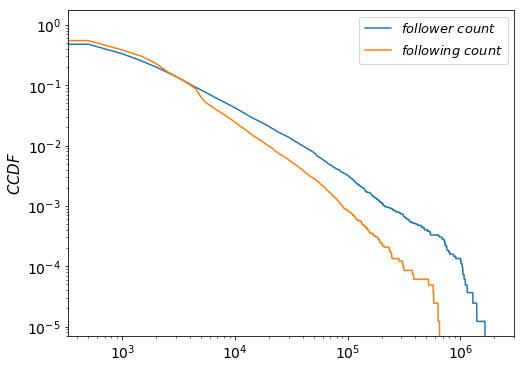

In [16]:
# user_data
def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf


plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_info['followers_count'], 0, 2000000, 500)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='$follower\ count$')

# pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_follower_count.csv')

x, cdf, pdf = get_cdf_pdf(user_info['friends_count'], 0, 1000000, 500)
plt.ylabel('$CCDF$', fontsize=15)
# pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_following_count.csv')


plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xscale('log'); plt.yscale('log')

plt.plot(x, cdf, label='$following\ count$')
plt.legend(fontsize=13)
plt.savefig('fig/fol.pdf', dpi=300)
plt.show()

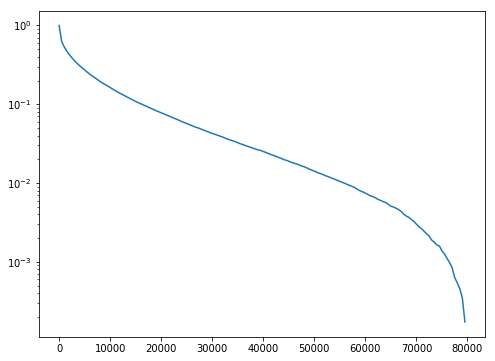

In [27]:
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_info['favourites_count'], 0, 80000, 500)
plt.yscale('log')
plt.plot(x, cdf)
plt.savefig('fig/favourites_count.pdf', dpi=300)
plt.show()

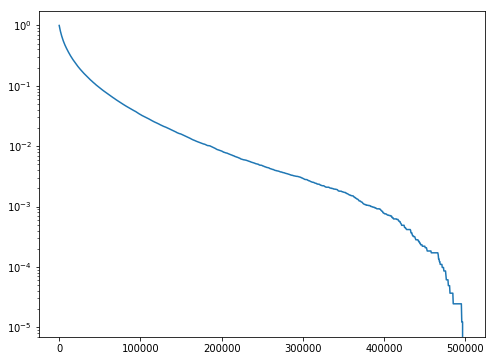

In [32]:
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_info['statuses_count'], 0, 500000, 500)
plt.yscale('log')
plt.plot(x, cdf)
plt.savefig('fig/statuses_count.pdf', dpi=300)
plt.show()

- 189620条谣言URL, 914272条初始推特；
- 25212个第一条谣言的用户, 88215个发初始推特的用户；

### 专门针对用户的分析，放到analyze_users.ipy（此文件）

In [36]:
user_data = defaultdict(list)

for fake in tqdm(url_tweets):
    url = fake["url"]
    for j, t in enumerate(fake["tweets"]):
        uid = t["user_id"]
        if t["origin"]:
            if j == 0: # first
                user_data[str(uid)].append({"id": t["id"], "role": 0, "url": url, "dt": t["dt"]})
            else:
                user_data[str(uid)].append({"id": t["id"], "role": 1, "url": url, "dt": t["dt"]})
        else:
            user_data[str(uid)].append({"id": t["id"], "role": 2, "url": url, "dt": t["dt"]})


100%|██████████| 189620/189620 [00:02<00:00, 76854.98it/s]


In [41]:
tmp = []
for uid, d in user_data.items():
    new_d = {"user_id": uid, "tweets": d}
    tmp.append(new_d)

In [52]:
# json.dump(tmp, open("data/user-behaviors.json", "w"), indent=2)

user_data = json.load(open("data/user-behaviors.json"))

In [53]:
with open("data/user-behavior-features.csv", "w") as f:
    f.write("user_id,first_count,source_count,other_count,all_count,url_count\n")
    for d in user_data:
        uid = d["user_id"]
        cnt_0 = 0
        cnt_1 = 0
        cnt_2 = 0
        url = set()
        for t in d["tweets"]:
            if t["role"] == 0:
                cnt_0 += 1
            elif t["role"] == 1:
                cnt_1 += 1
            elif t["role"] == 2:
                cnt_2 += 1
            url.add(t["url"])
        f.write("{},{},{},{},{},{}\n".format(uid, cnt_0, cnt_1, cnt_2, len(d["tweets"]), len(url)))
    

In [59]:
uids_of_IRA = set( [str(d) for d in json.load(open("data/IRA_match.json")).values()] )

In [54]:
user_data = pd.read_csv("data/user-behavior-features.csv")

In [60]:
cnt = 0

for i, row in user_data.iterrows():
    if row["user_id"] in uids_of_IRA:
        print(row["user_id"], row["url_count"])
        cnt += 1
        
cnt

4437444442 4
4272870988 16
2586506586 1
2671070290 12
4508630900 2
4218156466 1
1679279490 61
743166519157227520 13
1715424829 8
1533813962 4
1671234620 54
1694026190 11
2572058134 7
1623180199 3
3990577513 6
1662779209 18
2535818742 5
1652987412 1
2491081213 13
4289431230 3
2570631118 2
1720117201 3
1647045721 7
2606301939 15
1649967228 7
4224912857 3
2535166748 11
1651693646 9
1833223908 5
4332740714 3
1661246144 10
3083844539 5
4224729994 7
2533221819 1
4208754922 3
4355797094 5
1676481360 3
4209684039 2
1688370956 6
789266125485998080 76
737420000043139072 2
1629828379 9
1681162956 1
4311371968 8
1685718216 4
1655194147 2
1676377446 1
1659753702 1
2540758755 3
1649144358 2
1710804738 4
1690487623 2
3084866039 1
3312143142 1
1868981054 1
1617939218 1
1658202894 1
1653553555 1
1716228906 1


59